In [110]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

# float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Load and summary data

In [111]:
covid19Data = pd.read_csv("../input/covid-19/covid_19_data.csv")

In [112]:
covid19Data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [113]:
covid19Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [114]:
covid19Data.drop(['SNo','Province/State','Last Update'], axis=1, inplace=True)
covid19Data['ObservationDate'] = pd.to_datetime(covid19Data['ObservationDate'])
covid19Data['Confirmed'] = covid19Data['Confirmed'].values.astype(np.int64)
covid19Data['Deaths'] = covid19Data['Deaths'].values.astype(np.int64)
covid19Data['Recovered'] = covid19Data['Recovered'].values.astype(np.int64)

In [115]:
featureDf = covid19Data.groupby(['Country/Region','ObservationDate']).sum().reset_index()

In [116]:
featureDf.head(100)

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1,0,0
1,"('St. Martin',)",2020-03-10,2,0,0
2,Afghanistan,2020-02-24,1,0,0
3,Afghanistan,2020-02-25,1,0,0
4,Afghanistan,2020-02-26,1,0,0
...,...,...,...,...,...
95,Afghanistan,2020-05-27,12459,228,1138
96,Afghanistan,2020-05-28,13039,236,1209
97,Afghanistan,2020-05-29,13662,247,1259
98,Afghanistan,2020-05-30,14528,250,1303


In [117]:
featureDf.sort_values(by=['Country/Region','ObservationDate'],inplace=True)
featureDf.drop_duplicates(subset=['Country/Region'],keep='last',inplace=True)

In [118]:
featureDf.head(100)

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1,0,0
1,"('St. Martin',)",2020-03-10,2,0,0
462,Afghanistan,2021-05-29,70111,2899,57281
909,Albania,2021-05-29,132297,2449,129215
1369,Algeria,2021-05-29,128456,3460,89419
...,...,...,...,...,...
35210,Iceland,2021-05-29,6555,29,6476
35696,India,2021-05-29,27894800,325972,25454320
36150,Indonesia,2021-05-29,1809926,50262,1659974
36616,Iran,2021-05-29,2893218,79741,2425033


In [119]:
featureDf["Confirmed_Cat"] = pd.cut(featureDf["Confirmed"],
                               bins=[-1, 100, 1000, 10000, 100000, 1000000, 10000000, 50000000],
                               labels=['<100', '<1000', '<10.000', '<100.000', '<1M', '<10M', '>10M'])
featureDf["Deaths_Cat"] = pd.cut(featureDf["Deaths"],
                               bins=[-1, 100, 1000, 10000, 100000, 1000000, 10000000, 50000000],
                               labels=['<100', '<1000', '<10.000', '<100.000', '<1M', '<10M', '>10M'])
featureDf["Recovered_Cat"] = pd.cut(featureDf["Recovered"],
                               bins=[-1, 100, 1000, 10000, 100000, 1000000, 10000000, 50000000],
                               labels=['<100', '<1000', '<10.000', '<100.000', '<1M', '<10M', '>10M'])

<Axes: >

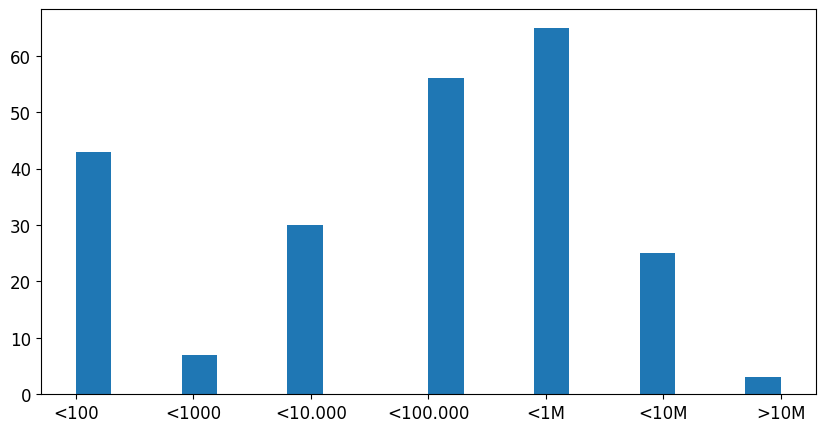

In [120]:
featureDf.sort_values('Confirmed',inplace=True)
featureDf['Confirmed_Cat'].hist(grid=False, bins=20, figsize=(10,5))

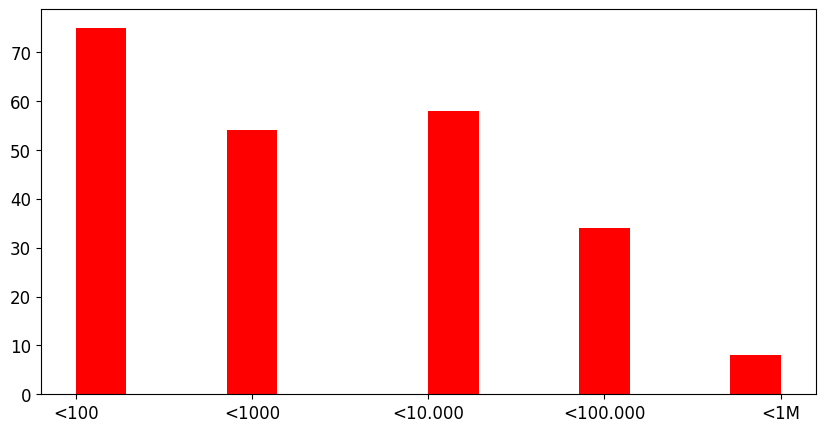

In [121]:
hist_chart2 = featureDf['Deaths_Cat'].hist(grid=False, bins=14, figsize=(10,5), color='red')

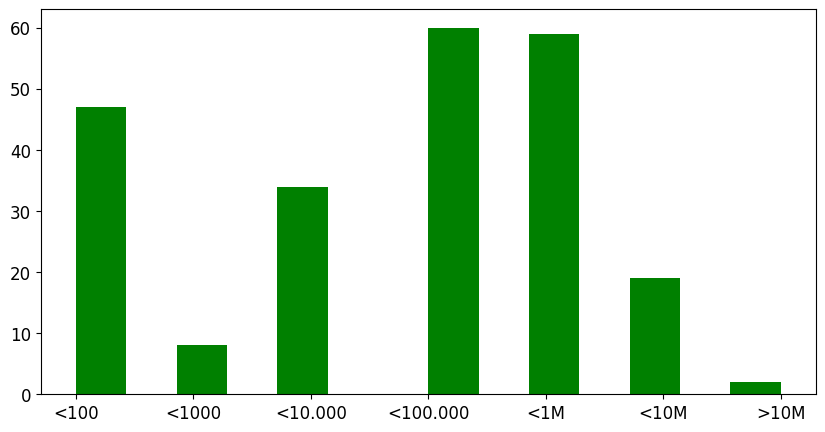

In [122]:
hist_chart3 = featureDf['Recovered_Cat'].hist(grid=False, bins=14, figsize=(10,5), color='green')

In [123]:
modelDf = featureDf.copy()
modelDf.drop(['ObservationDate', 'Country/Region', 'Confirmed_Cat', 'Deaths_Cat', 'Recovered_Cat'], axis=1, inplace=True)

In [124]:
modelDf.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.00,0.93,0.70
Deaths,0.93,1.00,0.62
Recovered,0.70,0.62,1.00


array([[<Axes: xlabel='Confirmed', ylabel='Confirmed'>,
        <Axes: xlabel='Deaths', ylabel='Confirmed'>,
        <Axes: xlabel='Recovered', ylabel='Confirmed'>],
       [<Axes: xlabel='Confirmed', ylabel='Deaths'>,
        <Axes: xlabel='Deaths', ylabel='Deaths'>,
        <Axes: xlabel='Recovered', ylabel='Deaths'>],
       [<Axes: xlabel='Confirmed', ylabel='Recovered'>,
        <Axes: xlabel='Deaths', ylabel='Recovered'>,
        <Axes: xlabel='Recovered', ylabel='Recovered'>]], dtype=object)

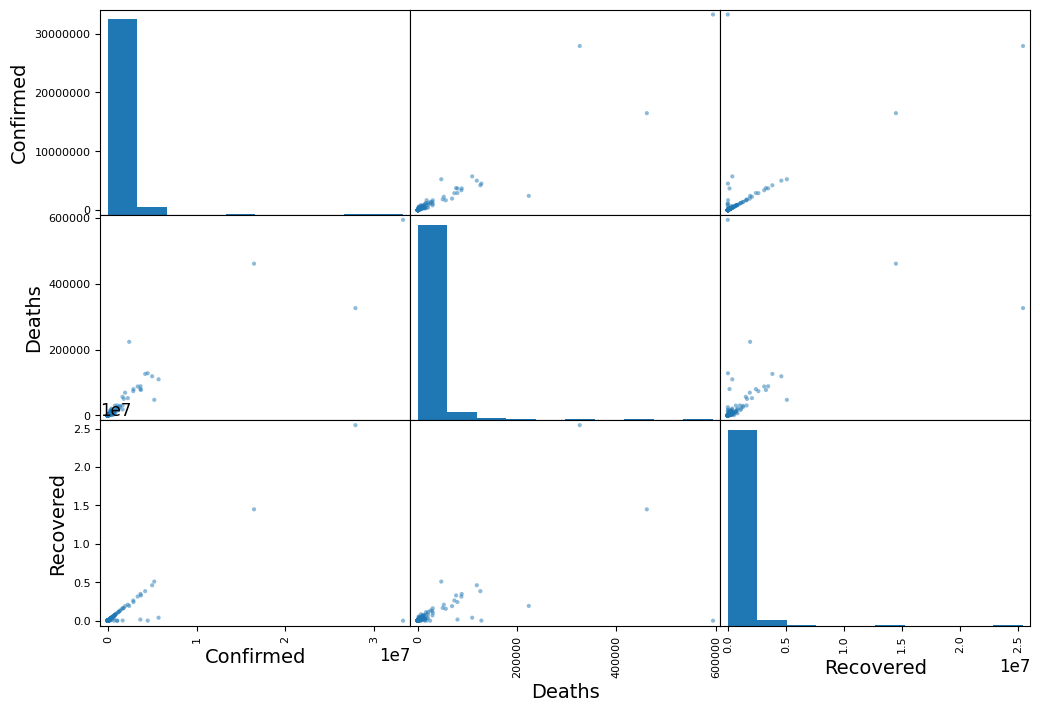

In [125]:
from pandas.plotting import scatter_matrix
scatter_matrix(modelDf[['Confirmed', 'Deaths', 'Recovered']], figsize=(12, 8))

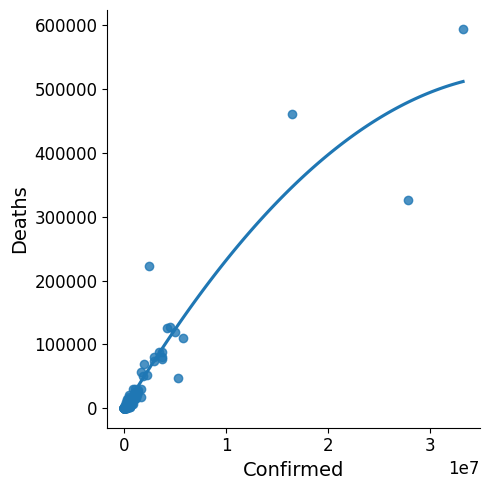

In [127]:
sns.lmplot(x ="Confirmed", y ="Deaths", data = modelDf,
                               order = 2, ci = None)

## Create a Test Set

In [128]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(modelDf, test_size=0.2, random_state=42)


In [129]:
train_set.head()

,Confirmed,Deaths,Recovered
74855,180593,1363,148391
45217,2179,86,2033
46558,273866,4245,254322
58209,5410,192,5083
83973,288172,4176,246321


In [130]:
train_set.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.00,0.93,0.70
Deaths,0.93,1.00,0.63
Recovered,0.70,0.63,1.00


In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set[['Confirmed']].values, train_set['Deaths'].values)

LinearRegression()

In [132]:
print(lin_reg.score(test_set[['Confirmed']].values, test_set['Deaths'].values))

0.7657262701701059


In [133]:
lin_reg.predict(test_set[['Confirmed']].values)

array([53167.0723181 ,  3020.95080145,  2935.39149583, 14967.56817193,
        2935.4088577 , 17509.86710095,  2935.42621957, 15690.44707795,
        6703.62957445,  4163.29253698, 42136.83191799,  2935.4088577 ,
        3209.22294231,  9302.23305462, 81008.65719867,  4792.17426754,
        5571.65287655,  2935.46094331, 93841.77175768, 10552.30520642,
        3465.43208863,  7364.49187339, 21641.523886  ,  9752.16596964,
        4152.64970939,  2935.4088577 ,  5630.75268912,  3337.70079572,
        3402.28695986,  3137.79620056, 16779.50522806,  3000.68949673,
        3775.25469594,  2939.575707  ,  2935.4088577 ,  4191.74864532,
        7336.50453559,  3868.95671956,  3128.88956018,  5367.56407022,
        3183.05860108,  7979.46674442,  5364.49101886,  3052.61885613,
        3611.34126161,  3548.07459974])

In [ ]:
import pandas as pd
import folium
from IPython.display import display

# Path to the CSV file on Kaggle
file_path = '/kaggle/input/covid19-proj/time_series_covid_19_confirmed.csv'

# Read data from the CSV file
df = pd.read_csv(file_path)

# Set default value for the 'Province/State' column to ''
df['Province/State'].fillna('', inplace=True)

# Create a world map using folium
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each row in the DataFrame
for index, row in df.iterrows():
    # Check if 'Lat' and 'Long' values are not NaN
    if not pd.isna(row['Lat']) and not pd.isna(row['Long']):
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=5,
            popup=f"{row['Country/Region']}<br>{row[df.columns[-1]]}",
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(world_map)

# Display the map directly in the notebook
display(world_map)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('/kaggle/input/covid19-proj/time_series_covid_19_recovered.csv')

# Drop rows where Province/State is not available
df_cleaned = df.dropna(subset=['Province/State'])

# Select the last column for plotting
recovery_column = df_cleaned.columns[-1]

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=recovery_column, y='Province/State', data=df_cleaned, palette='viridis')
plt.title('Number of recoveries by Province/State')
plt.xlabel('Number of recoveries')
plt.ylabel('Province/State')
plt.show()